# conda install -c conda-forge tensorflow - https://anaconda.org/conda-forge/tensorflow
# conda install -c conda-forge keras - https://anaconda.org/conda-forge/keras

In [1]:
import tensorflow as tf
#import keras

In [4]:
2048*1080*3

6635520

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
from tensorflow.keras.layers import Dense # Dense layers are "fully connected" layers
from tensorflow.keras.models import Sequential# Documentation: https://keras.io/models/sequential/
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training label shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)
print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

Training label shape:  (60000,)
First 5 training labels:  [5 0 4 1 9]


In [8]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [9]:
x_test.shape,y_test

((10000, 28, 28), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [10]:
x_test[:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0

In [11]:
import matplotlib.pyplot as plt

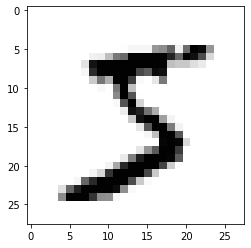

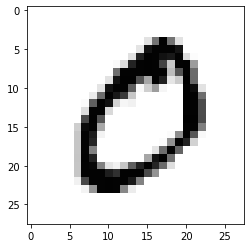

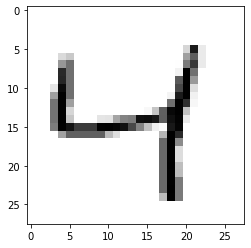

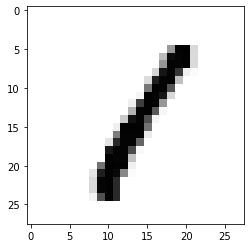

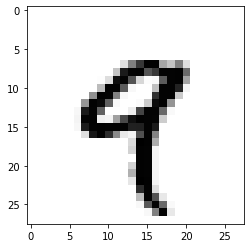

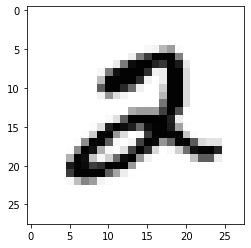

In [12]:
for i in range(6):
    img = x_train[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [11]:
28*28

784

# Prepare the dataset

In [13]:
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

In [14]:
x_train.shape

(60000, 784)

In [15]:
num_classes = 10

# Encode the Labels as One - Hot - Encoding Tensor or Vector

In [16]:
y_train_encode = to_categorical(y_train, num_classes)
y_test_encode = to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train_encode[:10])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [17]:
y_train_encode.shape

(60000, 10)

In [18]:
image_size = 784 # 28*28
num_classes = 10 # ten unique digits

In [19]:
model = Sequential()

In [20]:
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [21]:
import sys
print(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [23]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train_encode, batch_size=32, epochs=5, verbose=True, validation_split=.1)

Epoch 1/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3925 - accuracy: 0.8896 - val_loss: 0.3494 - val_accuracy: 0.9043
Epoch 2/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3881 - accuracy: 0.8888 - val_loss: 0.3153 - val_accuracy: 0.9105
Epoch 3/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3836 - accuracy: 0.8894 - val_loss: 0.2998 - val_accuracy: 0.9123
Epoch 4/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3685 - accuracy: 0.8934 - val_loss: 0.3121 - val_accuracy: 0.9158
Epoch 5/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3548 - accuracy: 0.8971 - val_loss: 0.2895 - val_accuracy: 0.9173


In [26]:
model.predict(x_test)

array([[5.69186988e-04, 2.05439545e-04, 3.67456727e-04, ...,
        9.83556628e-01, 4.88914266e-05, 1.16586555e-02],
       [6.41693920e-03, 9.87911690e-03, 8.37257206e-01, ...,
        3.96980933e-04, 1.67063735e-02, 7.63674543e-05],
       [8.69193627e-06, 9.86303985e-01, 6.42274087e-03, ...,
        6.83509803e-04, 3.27416440e-03, 2.95946607e-04],
       ...,
       [3.88161279e-04, 1.91390933e-03, 1.83667755e-03, ...,
        5.92107046e-03, 4.71267365e-02, 1.98775351e-01],
       [5.89165883e-03, 1.57492224e-03, 8.32588971e-03, ...,
        7.40130246e-03, 3.23245883e-01, 7.91089609e-03],
       [2.42574816e-03, 3.17660277e-04, 3.13094519e-02, ...,
        9.25400309e-05, 4.62466996e-04, 1.36306568e-04]], dtype=float32)

In [27]:
y_pred = model.predict(x_test)>0.8
print(y_test_encode)
print(y_pred)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[False False False ...  True False False]
 [False False  True ... False False False]
 [False  True False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [25]:
#import numpy as np
#np.count_nonzero(y_pred),np.count_nonzero(y_test)

In [28]:
type(y_pred)

numpy.ndarray

In [29]:
history = model.fit(x_train, y_train_encode, batch_size=32, epochs=5, verbose=True, validation_split=.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3631 - accuracy: 0.8946 - val_loss: 0.3117 - val_accuracy: 0.9112
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3519 - accuracy: 0.8970 - val_loss: 0.3425 - val_accuracy: 0.9006
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3414 - accuracy: 0.9012 - val_loss: 0.3242 - val_accuracy: 0.9072
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3527 - accuracy: 0.8947 - val_loss: 0.3154 - val_accuracy: 0.9085
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3315 - accuracy: 0.9008 - val_loss: 0.3123 - val_accuracy: 0.9073


In [27]:
_, train_acc = model.evaluate(x_train, y_train_encode, verbose=0)
_, test_acc = model.evaluate(x_test, y_test_encode, verbose=0)

In [28]:
train_acc,test_acc

(0.9121333360671997, 0.9096999764442444)

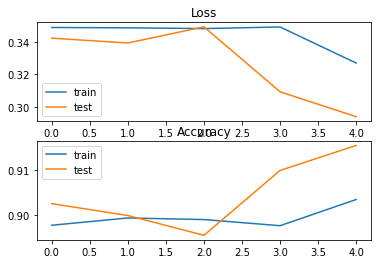

In [29]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [31]:
# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(x_test, verbose=0)

C:\Users\Dr.PVVK\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [32]:
y_test,yhat_classes

(array([7, 2, 1, ..., 4, 5, 6], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64))

In [34]:
e = y_test-yhat_classes
str(e).count('0')

6